<h1><center>EDA - House Prices</center></h1>

<center><img src="https://cdn.banyanhill.com/wp-content/uploads/2022/03/25122751/Great-Stuff-Main-Image-03-27-2022.png"
    alt="meme house prices" title="meme house prices"></center>

```> Basé sur le notebook : https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python/notebook```

_Created by Charley Lebarbier_

> ___L'objectif de ce notebook est de donner une idée de comment se déroule le flux de travail dans n'importe quel problème de modélisation prédictive.___

<center><img src="http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png" alt="schema EDA" title="schema EDA"></center>

### Préparation de l'environnement de travail sous python

In [39]:
# Import des librairies qu'on va utiliser lors de l'EDA

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

%matplotlib inline

plt.style.use('bmh')    # style pour les graphs : Bayesian Methods for Hackers

In [3]:
# Chargement du fichier à analyser
df = pd.read_csv('train.csv')
df.head()   #vérification des premières lignes pour voir le contenu

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# On regarde les informations concernant le dataframe et les colonnes
df.info()

# Il est composé de 80 colonnes  avec 1460 lignes au total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

A partir de ces informations, on peut déjà voir que certaines caractéristiques ne seront pas pertinentes dans notre analyse exploratoire car il y a trop de valeurs manquantes (comme Alley et PoolQC). 

De plus, il y a tellement de caractéristiques à analyser qu'il est préférable de se concentrer sur celles qui peuvent nous donner de réelles informations. 

Pour cela, nous allons déjà supprimer _Id_ et les caractéristiques avec _<= 30%_ de valeurs _NaN_.


In [5]:
# Pour protéger la df originelle, on va travailler sur une df2 temporaire

# On garde les caractéristiques supérieur à 30%
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]

# On supprime la caractéristique 'Id'
del df2['Id']

# On print les columns supprimées
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end= ", ")
print('\n')

df = df2    # On réintégre la df temporaire dans la df originale

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Figure size 900x800 with 0 Axes>

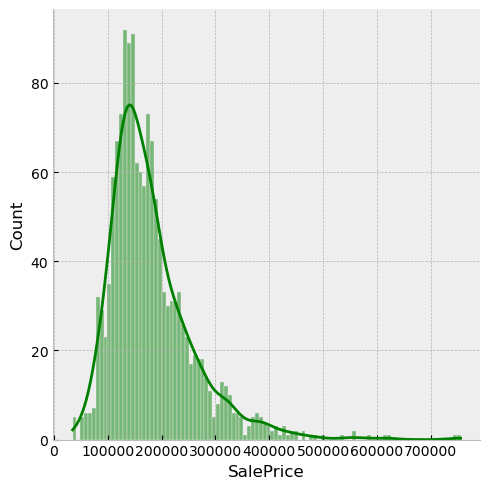

In [6]:
# On va regarder les informations autours des prix des maisons.
# Puis visualiser l'ensemble via un graphique

print(df['SalePrice'].describe())   # describe() permet de résumer les informations
                                    # les tendances, le min, le max, la moyenne, etc.

# Création du graphique
plt.figure(figsize=(9,8))
sns.displot(df['SalePrice'], color='g', bins=100, kde=True)
plt.show()

# Avec les informations du graph, on peut voir l'asymétrismes des prix 
# à droite. Par ailleurs, certaines valeurs sont aberrantes au-dessus de ~500,000.
# Nous voudrons éventuellement nous en débarrasser pour obtenir une distribution 
# normale de la variable indépendante (`SalePrice`) pour l'apprentissage automatique.

### Distribution des données numériques

Pour cette partie, nous allons nous intéresser à la répartition de toutes les caractéristiques sur un graph.

In [7]:
# On va d'abord vérifier les types de données que contient notre dataframe
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [8]:
# On récupère les données seulement numérique dans une nouvelle variable df_num
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()   # On check les premières lignes de notre nouveau df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


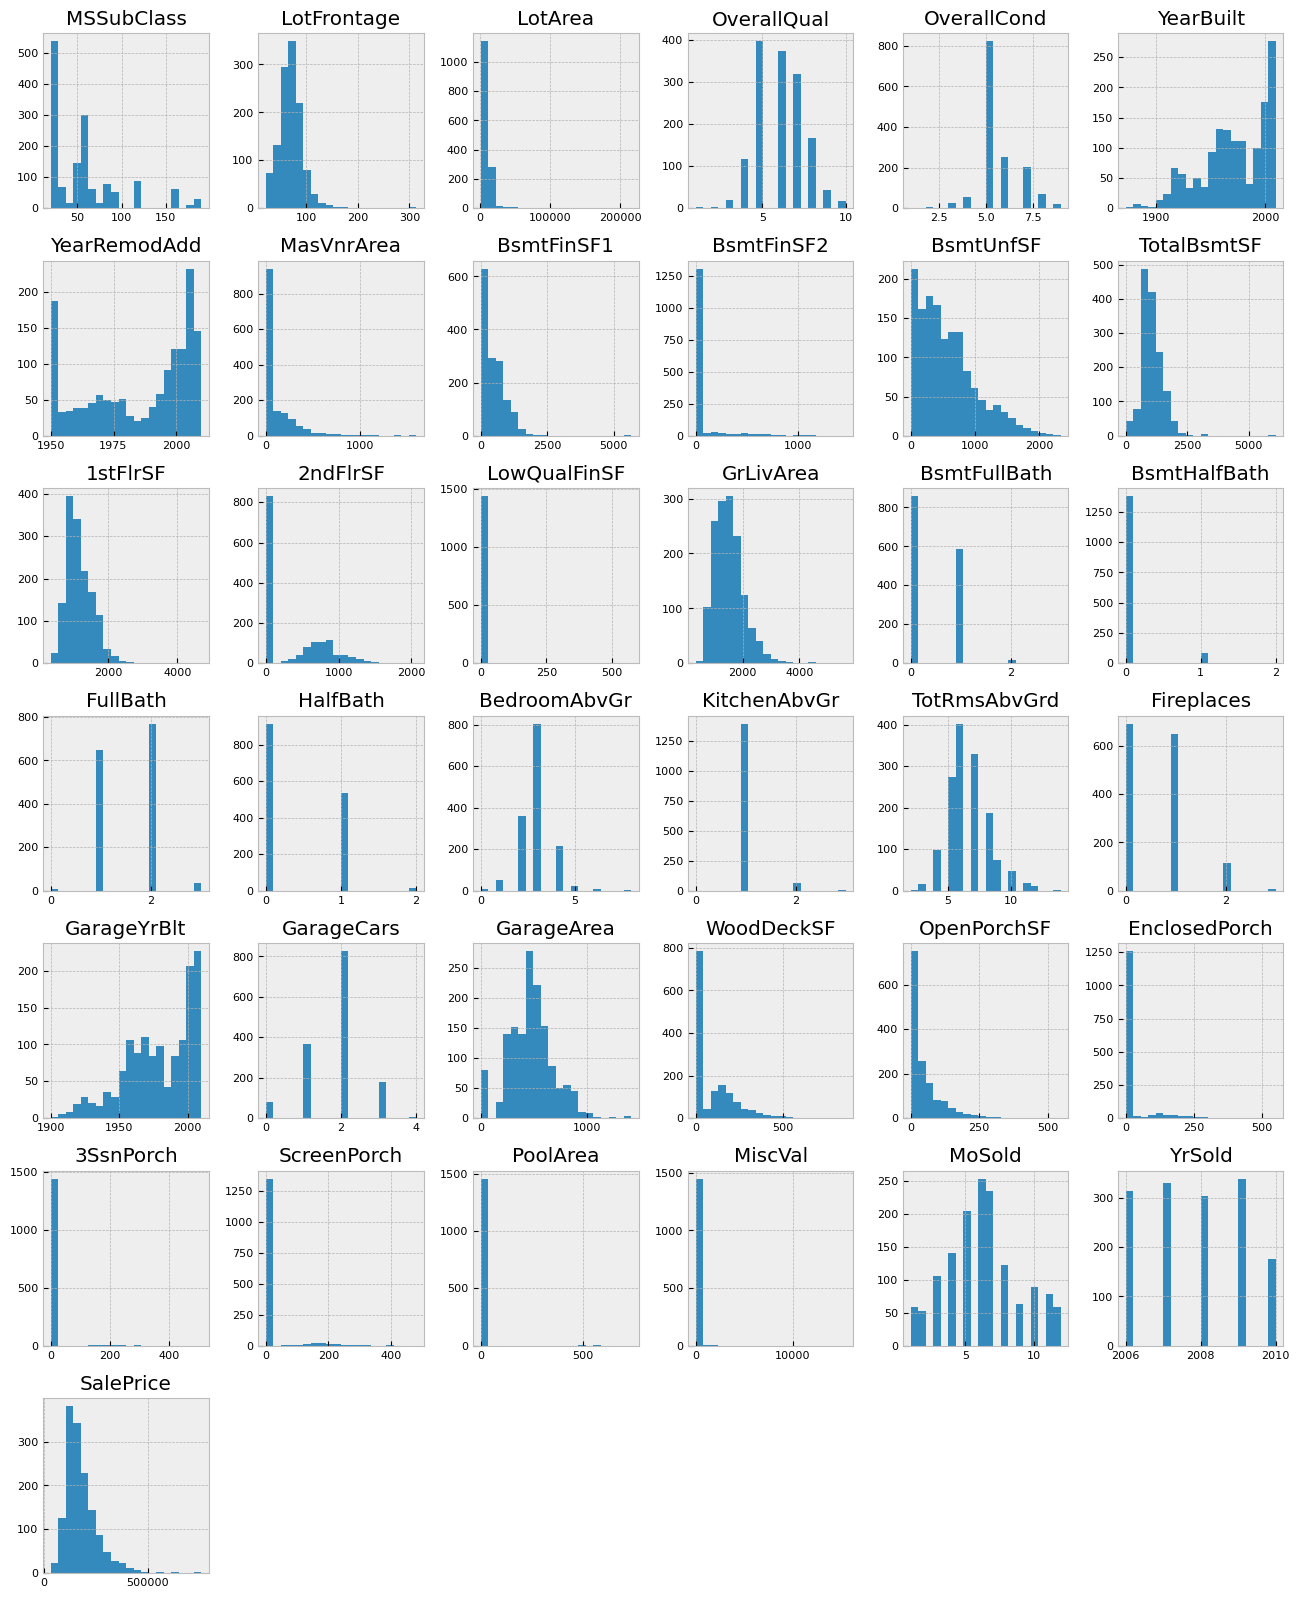

In [9]:
# Maintenant, nous allons visualiser l'ensemble de ces données en graphique
# afin d'avoir une information plus facile à lire et interpréter

df_num.hist(figsize=(16,20), bins=20, xlabelsize=8, ylabelsize=8);

# On remarque une distribution similaire à notre 'SalePrice' sur les caractéristiques:
# 'LotFrontage' ; 'GrLivArea' ; 'lstFlSF' ; 'TotalBsmtSF', etc. 

##### Corrélations

Maintenant, nous allons essayer de trouver les corrélations qui sont fortement liées à notre caractéristique 'SalePrice', afin de les stocker dans une variable _'golden_features_list'_. 

Pour cela, nous allons réutiliser notre df_num

In [10]:
df_num_corr = df_num.corr()['SalePrice'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)

print(f"There is {len(golden_features_list)} strongly correlated"
    + f"values with SalePrice:\n{golden_features_list}")

There is 10 strongly correlatedvalues with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


On n'a maintenant une liste de valeurs fortement corrélées. 
Néanmoins, celle-ci est incomplète car nous savons que la corrélation est affectée par les valeurs aberrantes. 

On peut procéder comme suit :

- Tracer les caractéristiques numériques et voir lesquelles ont très peu de valeurs aberrantes ou explicables.
- Retirer les valeurs aberrantes de ces caractéristiques et voir lesquelles peuvent avoir une bonne corrélation sans leurs valeurs aberrantes.

La corrélation en elle-même n'explique pas toujours la relation entre les données, donc les tracer pourrait même nous mener à de nouvelles idées. De plus, nous pourrons vérifier que nos valeurs corrélées ont une relation linéaire avec le prix de vente.

Par exemple, les relations telles que les relations curvilignes ne peuvent pas être devinées simplement en regardant la valeur de corrélation. Prenons donc les caractéristiques que nous avons exclues de notre tableau de corrélation et traçons-les pour voir si elles présentent une sorte de modèle.

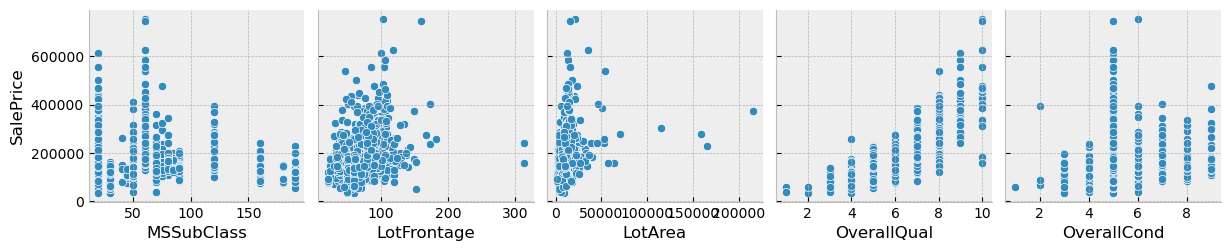

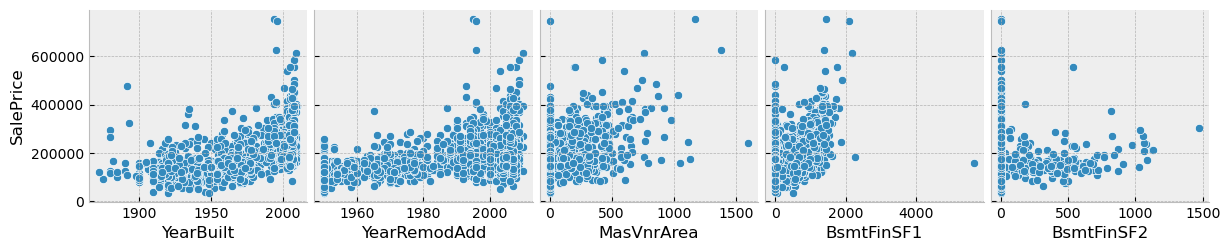

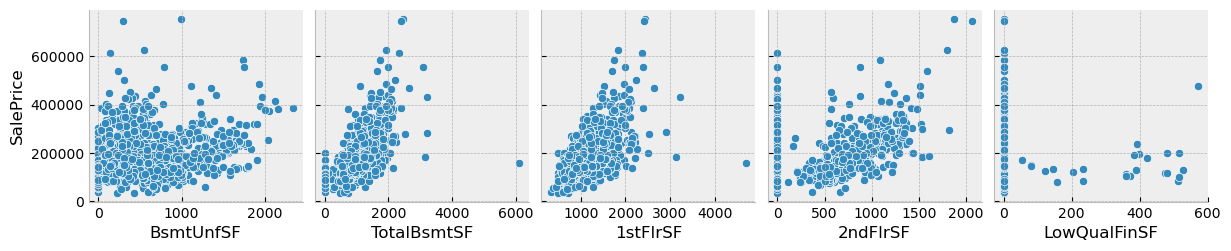

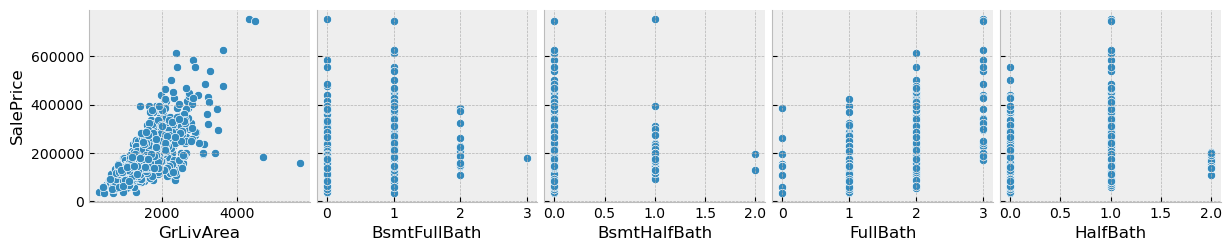

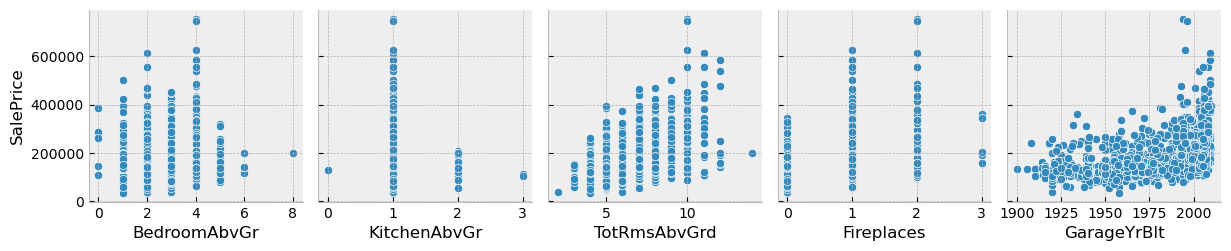

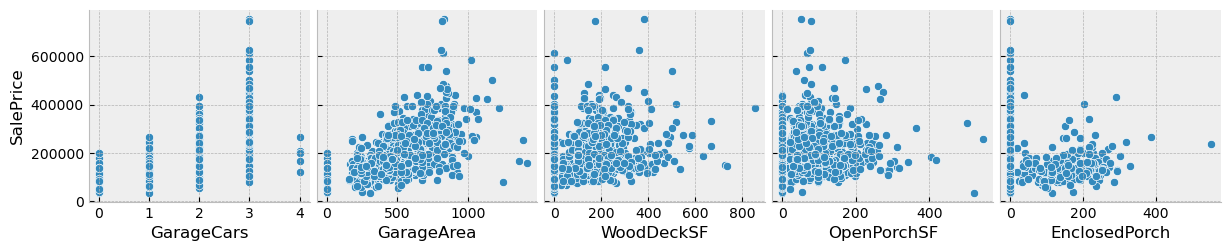

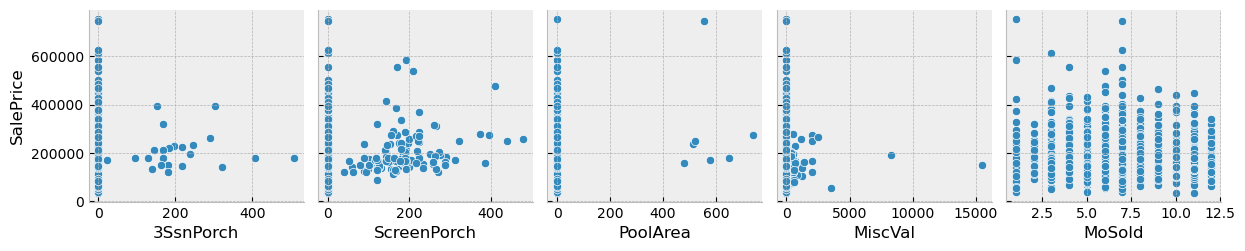

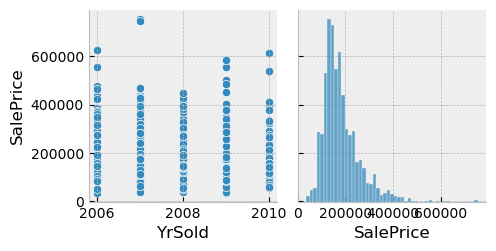

In [11]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data = df_num,
                 x_vars = df_num.columns[i:i+5],
                 y_vars = ['SalePrice'])

On peut clairement identifier certaines relations. La plupart d'entre elles semblent avoir une relation linéaire avec le prix de vente ; et si nous regardons de près les données, nous pouvons voir que beaucoup de points sont situés sur x = 0, ce qui peut indiquer l'absence d'une telle caractéristique dans la maison.

Exemple : OpenPorchSF ; EnclosedPorchSF; etc...

Donc, on peut supprimer ces éléments où la valeur est égale à 0, afin de refaire nos graphs de corrélation.

In [13]:
import operator    # Librairie pour avoir des fonctions mathématiques

individual_features_df = []
for i in range(0, len(df_num.columns) -1 ):    # -1 car dernière col: SalePrice
    tmp_df = df_num[[df_num.columns[i], 'SalePrice']]
    tmp_df = tmp_df[tmp_df[df_num.columns[i]] != 0]
    individual_features_df.append(tmp_df)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0]\
    for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key,value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.52289733287949

Ceci permet de voir bien plus facilement les corrélations entre les valeurs.

In [14]:
# On regarde les colonnes où il y a les plus fortes corr avce SalePrice

golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print(f"This is {len(golden_features_list)} strongly correlated values with SalePrice:\n{golden_features_list}")

This is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


#### Conclusion

On a pu trouver 11 fortes corrélations avec le `SalePrice`. 
Plus tard, avec l'ingénierie des caractéristiques, on pourra ajouter des valeurs fictives où la valeur d'une caractéristique donnée _'> 0'_ sera 1 (cad : précense de cette caractéristique) et _'0'_ sera 0.
Pour `2ndFlrSF` par exemple, on pourra créer une valeur fictive pour sa précense ou sa non-précense et finalement l'additionner à `1stFlrSF`.

Outre ces corrélations, on peut voir qu'aucun modèle notable de corrélations apparaît sur les autres données.

##### Visualisation des relations entre les caractéristiques

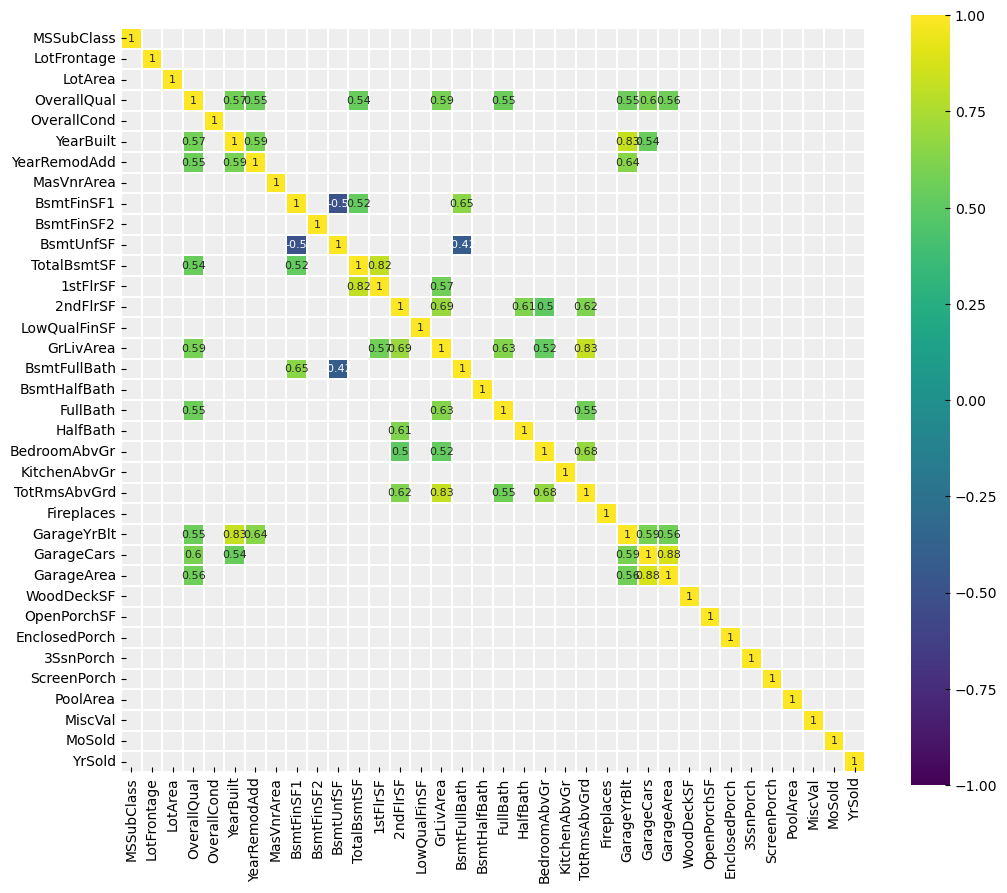

In [15]:
corr = df_num.drop('SalePrice', axis=1).corr()  # On a déjà regarder les corrélations avec SalePrice

plt.figure(figsize=(12,10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],\
    cmap='viridis', vmax=1.0, vmin=-1.0,linewidths=0.1,\
    annot=True, annot_kws={'size': 8}, square=True)
plt.show()

De nombreuses caractéristiques semblent être corrélées entre elles, mais certaines d'entre elles, telles que YearBuild/GarageYrBlt, peuvent simplement indiquer une inflation des prix au fil des ans. Quant à 1stFlrSF/TotalBsmtSF, il est normal que plus le 1er étage est grand (étant donné que de nombreuses maisons n'ont qu'un seul étage), plus le sous-sol total sera grand.

Maintenant, pour ceux qui sont moins évidents, nous pouvons voir que :
- Il y a une forte corrélation négative entre BsmtUnfSF (pieds carrés non finis de la surface du sous-sol) et BsmtFinSF2 (pieds carrés finis de type 2). Il existe une définition des pieds carrés non finis ici, mais pour ce qui est d'une maison de "Type 2", je ne peux pas dire ce qu'il en est réellement.
- HalfBath/2ndFlrSF est intéressant et peut indiquer que les gens accordent une importance à ne pas avoir à se précipiter en bas en cas de besoin urgent d'aller aux toilettes.

Il y a bien sûr beaucoup plus à découvrir, mais on donne ici les principales corrélations explicatives.

Nous pouvons conclure que, par essence, certaines de ces fonctionnalités peuvent être combinées entre elles afin d'en réduire le nombre (`1stFlrSF`/`TotalBsmtSF`, `GarageCars`/`GarageArea`) et d'autres indiquent que les gens s'attendent à ce que plusieurs fonctionnalités soient regroupées.


##### Visualisation des relations quantitatives

Examinons maintenant les caractéristiques quantitatives de notre dataframe et leur relation avec le SalePrice qui est également quantitatif (d'où la relation Q -> Q).

Certaines des caractéristiques de notre jeu de données sont catégoriques. Pour séparer les caractéristiques catégorielles des caractéristiques quantitatives, nous nous référons au fichier data_description.txt. Selon ce fichier, nous obtenons les colonnes suivantes :

In [16]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea',\
    'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',\
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',\
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',\
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


In [17]:
# On se retrouve avec beaucoup de caractéristiques à analyser, alors prenons les 
# caractéristiques quantitatives fortement corrélées de cet ensemble de données et analysons-les une par une.

features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

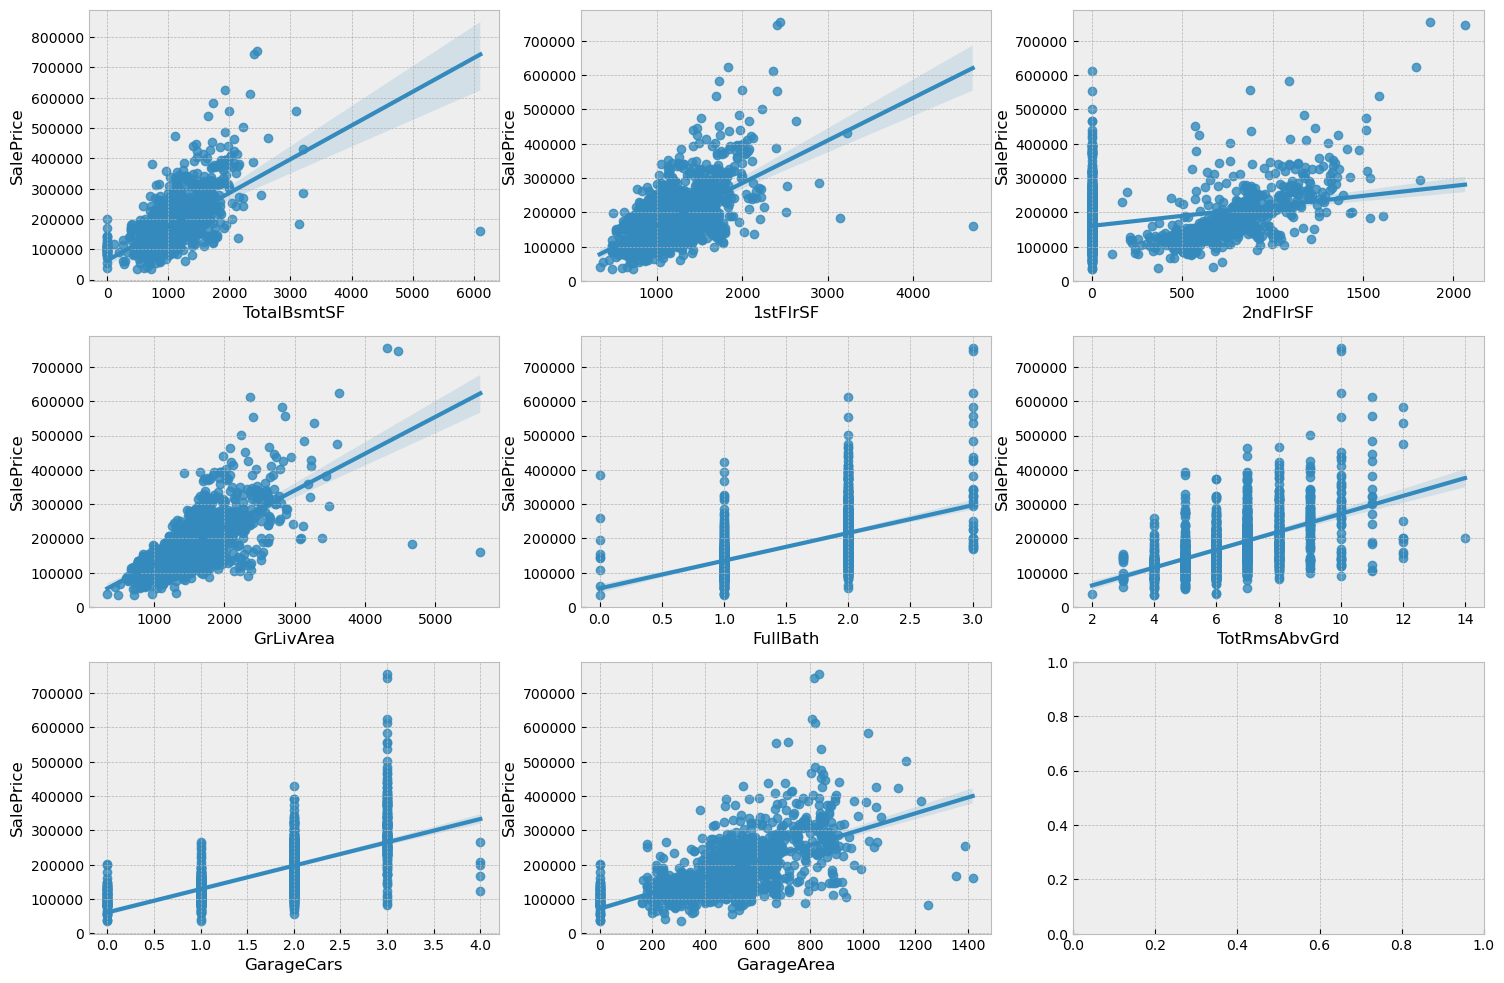

In [21]:
# Visualisons leur répartition

fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize=(18,12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) -1:
        sns.regplot(data=df[features_to_analyse], x=features_to_analyse[i], y='SalePrice', ax=ax)
plt.show()

# On peut voir que les caractéristiques TotalBsmtSF, 1stFlrSF, GrLivArea ont la plus grande dispersion.

##### Relation entre catégorielle et quantitative

Récupérons toutes les caractéristiques catégorielles de notre ensemble de données et voyons si nous pouvons y trouver des informations. 

Au lieu de rouvrir notre fichier data_description.txt et de vérifier quelles données sont catégoriques, supprimons simplement quantitative_features_list de l'ensemble de notre cadre de données.

In [22]:
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist()\
    if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [25]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print(f"There is {len(df_not_num.columns)} non numerical features including:\n\
    {df_not_num.columns.tolist()}")

There is 39 non numerical features including:
    ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


En regardant ces caractéristiques, on peut voir que beaucoup d'entre elles sont du type `Object(O)`. Dans notre cahier de transformation de données, on peut utiliser les fonctions catégorielles de Pandas (http://pandas.pydata.org/pandas-docs/stable/categorical.html) (équivalent du facteur de R) pour façonner nos données d'une manière qui serait interprétable pour notre algorithme d'apprentissage automatique. Par exemple, `ExterQual` pourrait être transformé en un objet catégorique ordonné.

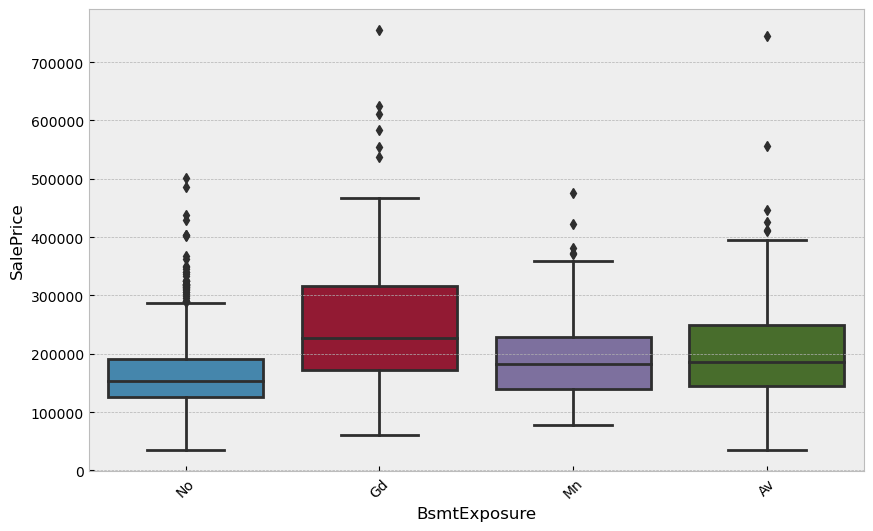

In [29]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(data=df_categ, x='BsmtExposure', y='SalePrice')
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k')
plt.xticks(rotation = 45)
plt.show()

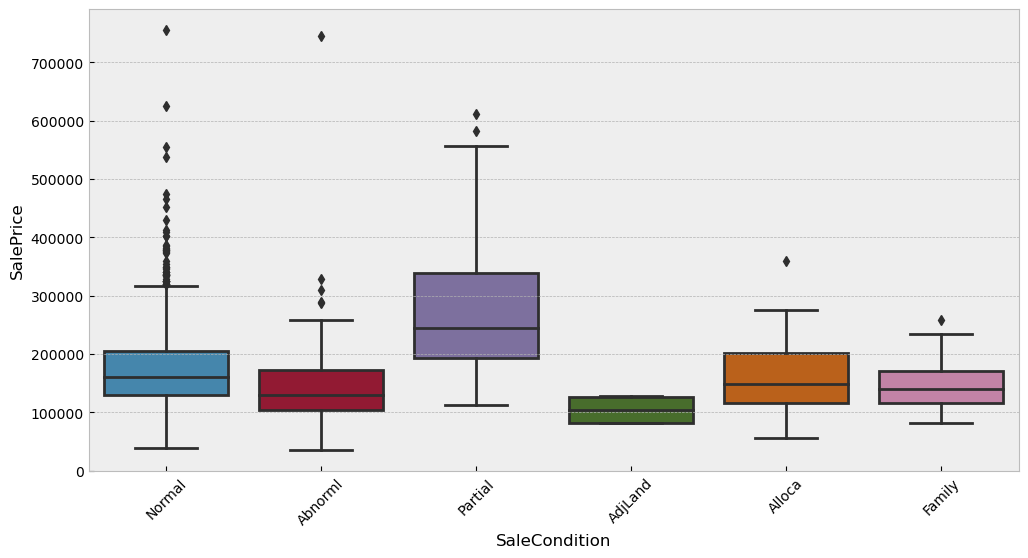

In [30]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(data=df_categ, x='SaleCondition', y='SalePrice')
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k')
plt.xticks(rotation=45)
plt.show()

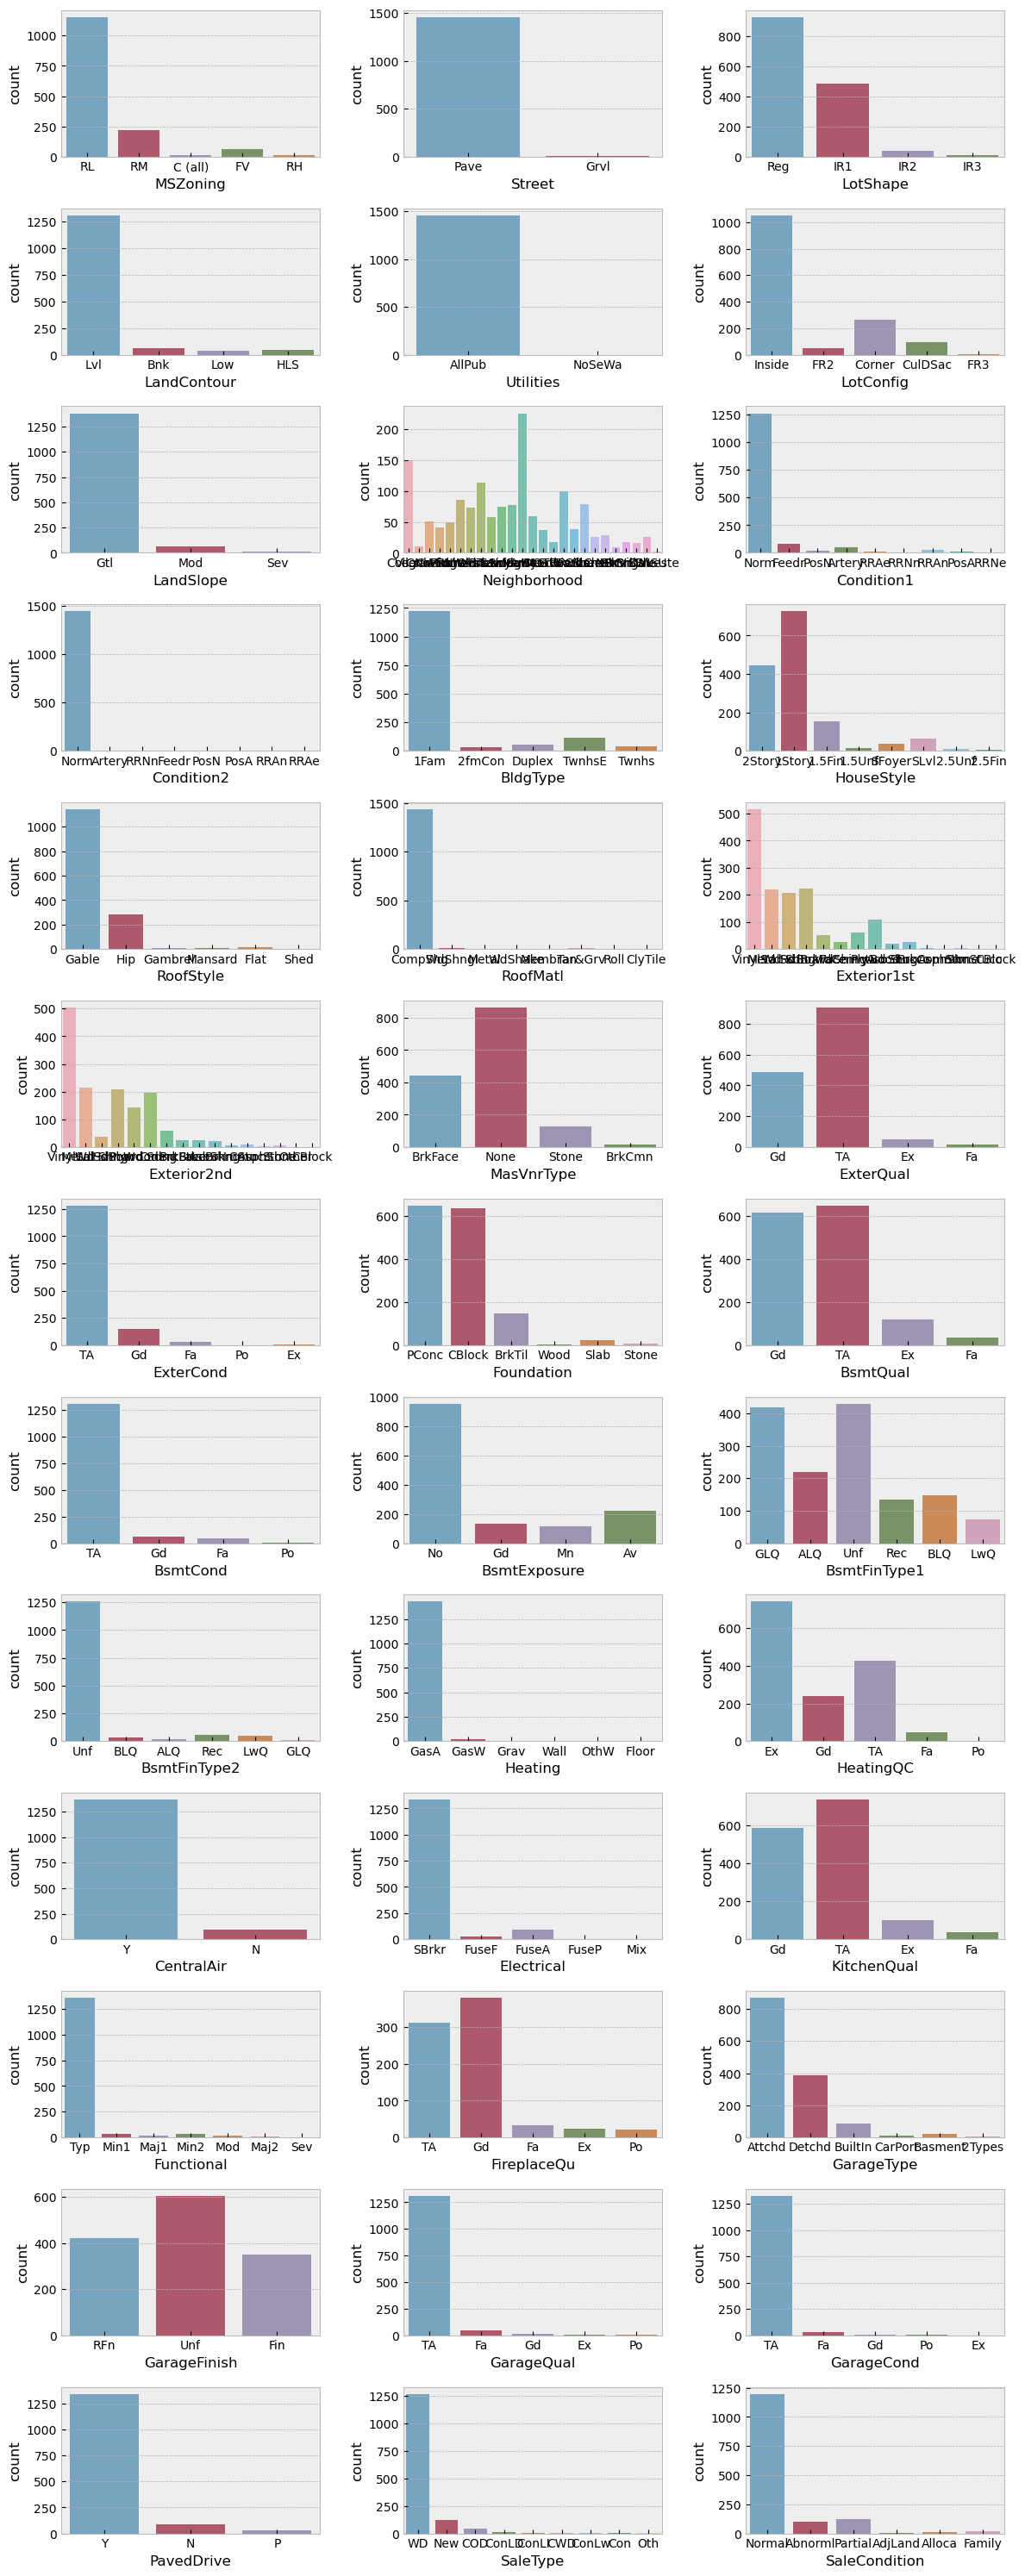

In [43]:
fig, ax = plt.subplots(round(len(df_not_num.columns)/3), 3, figsize =(12,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        #- Début code pour éviter les erreurs de données tmp / code plus long à exec: 33s
        ax.xaxis.set_major_locator(mticker.MaxNLocator(3))
        ticks_loc = ax.get_xticks().tolist()
        ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        #- Fin du code erreur tmp

        # Ancien code qui provoque les warnings
        # ax.set_xticklabels(ax.xaxis.get_majorticklabels(mticker.FixedLocator(ticks_loc)), rotation=45);
        sns.countplot(data=df_not_num, x = df_not_num.columns[i], alpha=.7, ax=ax);

fig.tight_layout()
plt.show()

On peut voir que certaines catégories sont prédominantes pour certaines caractéristiques telles que `Utilities`, `Heating`, `GarageCond`, `Functional`.... 
Mais, ces caractéristiques pourraient se révéler peu pertinentes pour notre modèle prédictif.

<center><h1>THE END</h1></center>